## The process used to add context to a word
<img src="plan.png" height="400">

Importing libraries

In [19]:
import pickle
import numpy as np
import torch
import string
from scipy import spatial
import matplotlib.pylab as plt

Importing english stop words

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  

Reading 300 dimensional words embeddings from pickle file

In [21]:
with open('data_300.pickle', 'rb') as fp:
    embeddings_dict = pickle.load(fp)

Function to get n closest words to an embedding

In [22]:
def closest(word_embedding,n):
    sorted_array = sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.cosine(embeddings_dict[word], word_embedding))[1:n+1]
    return [[word, '{:.3f}'.format(spatial.distance.cosine(embeddings_dict[word], word_embedding))] for word in sorted_array]

Defining the target word and the two themes

In [23]:
word = "tie"

theme1 = "wedding"
theme2 = "soccer"

word_emb = embeddings_dict[word]
theme_emb1 = embeddings_dict[theme1]
theme_emb2 = embeddings_dict[theme2]

distance1 = spatial.distance.cosine(word_emb,theme_emb1)
distance2 = spatial.distance.cosine(word_emb,theme_emb2)

print("Distance {}-{} before context : {}".format(word,theme1,distance1))
print("Distance {}-{} before context : {}".format(word,theme2,distance2))

Distance tie-wedding before context : 0.8111767768859863
Distance tie-soccer before context : 0.7726714313030243


The closest words to "tie" are sports related

In [24]:
closest(word_emb,10)

[['tied', '0.279'],
 ['tying', '0.376'],
 ['3-3', '0.415'],
 ['2-2', '0.421'],
 ['1-1', '0.425'],
 ['3-2', '0.461'],
 ['match', '0.483'],
 ['win', '0.490'],
 ['4-4', '0.491'],
 ['scoreless', '0.494']]

Defining the context of the word in order to add meaning

In [25]:
context = "Normally a bow tie is used when dressing in a tuxedo, which is the representation of the distinction when dressing formal. Also it is constantly related to take it in great occasions, like ceremonies weddings or very elegant parties"

Removing punctuation and changing to lower case then removing stop words

In [26]:
context = context.translate(str.maketrans('', '', string.punctuation)).lower().split(" ")

In [27]:
context = [ word for word in context if word in embeddings_dict.keys() ]

In [28]:
context = [ word for word in context if word not in stop_words]

The processed context is used 

In [29]:
print( " ".join(context))

normally bow tie used dressing tuxedo representation distinction dressing formal also constantly related take great occasions like ceremonies weddings elegant parties


In [32]:
embeddings = [embeddings_dict[word] for word in context]

Computing the coefficients using dot product

In [33]:
coefficients = np.dot(embeddings,word_emb)

Normalizing the coefficients

In [34]:
coefficients = coefficients / np.sum(coefficients)

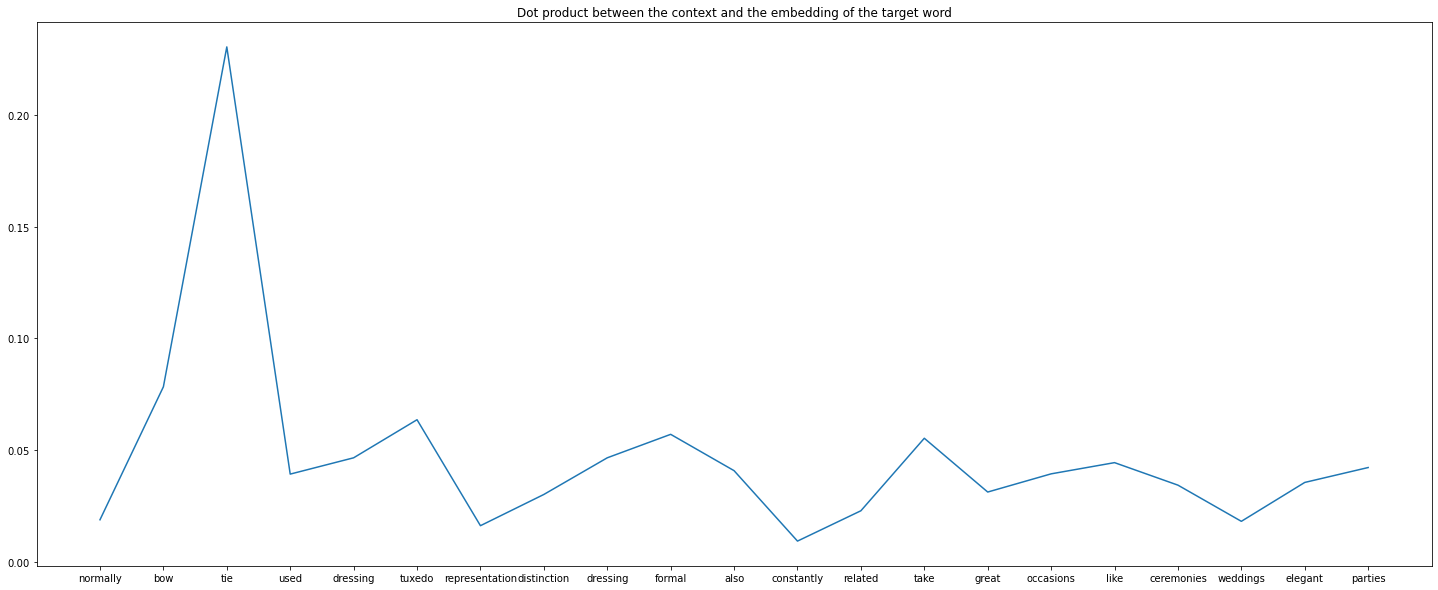

In [35]:
plt.figure(figsize=(25,10))
x = np.arange(len(context))
plt.xticks(x, context)
plt.plot(x,list(coefficients))
plt.title("Dot product between the context and the embedding of the target word")
plt.show()

Computing the result embedding

In [36]:
new_embedding = np.dot(coefficients.T,embeddings)

Calculating the new distances

In [37]:
distance1 = spatial.distance.cosine(new_embedding,theme_emb1)
distance2 = spatial.distance.cosine(new_embedding,theme_emb2)

print("Distance {}-{} after context : {}".format(word,theme1,distance1))
print("Distance {}-{} after context : {}".format(word,theme2,distance2))

Distance tie-wedding after context : 0.5746057629585266
Distance tie-soccer after context : 0.7265940010547638


The new closest words are not sports related and the closest word is now "dress"

In [38]:
closest(new_embedding,10)

[['dress', '0.398'],
 ['even', '0.400'],
 ['way', '0.418'],
 ['instead', '0.419'],
 ['always', '0.429'],
 ['kind', '0.430'],
 ['take', '0.431'],
 ['with', '0.431'],
 ['make', '0.432'],
 ['but', '0.433']]